k-NN CLASSIFICATION PROBLEM

Dataset points:
  A = (1, 4) (Group 1)
  B = (2, 4) (Group 1)
  C = (6, 5) (Group 2)
  D = (7, 6) (Group 2)
  E = (9, 1) (Group 1)

Query point q = (5, 4)
k = 3

(a) EUCLIDEAN DISTANCE
d(q, A) = √[(5-1)² + (4-4)²] = √[16 + 0] = 4.0000
d(q, B) = √[(5-2)² + (4-4)²] = √[9 + 0] = 3.0000
d(q, C) = √[(5-6)² + (4-5)²] = √[1 + 1] = 1.4142
d(q, D) = √[(5-7)² + (4-6)²] = √[4 + 4] = 2.8284
d(q, E) = √[(5-9)² + (4-1)²] = √[16 + 9] = 5.0000

Sorted distances (Euclidean):
  1. C: 1.4142 (Group 2)
  2. D: 2.8284 (Group 2)
  3. B: 3.0000 (Group 1)
  4. A: 4.0000 (Group 1)
  5. E: 5.0000 (Group 1)

Three nearest neighbors: C, D, B

(b) CLASSIFICATION WITH EUCLIDEAN DISTANCE

Voting from 3 nearest neighbors:
  C (distance: 1.4142) → Group 2
  D (distance: 2.8284) → Group 2
  B (distance: 3.0000) → Group 1

Vote count:
  Group 1: 1 votes
  Group 2: 2 votes

→ Query point q is classified as: GROUP 2

(c) MANHATTAN (L1) DISTANCE
d(q, A) = |5-1| + |4-4| = 4 + 0 = 4.0000
d(q, B) 

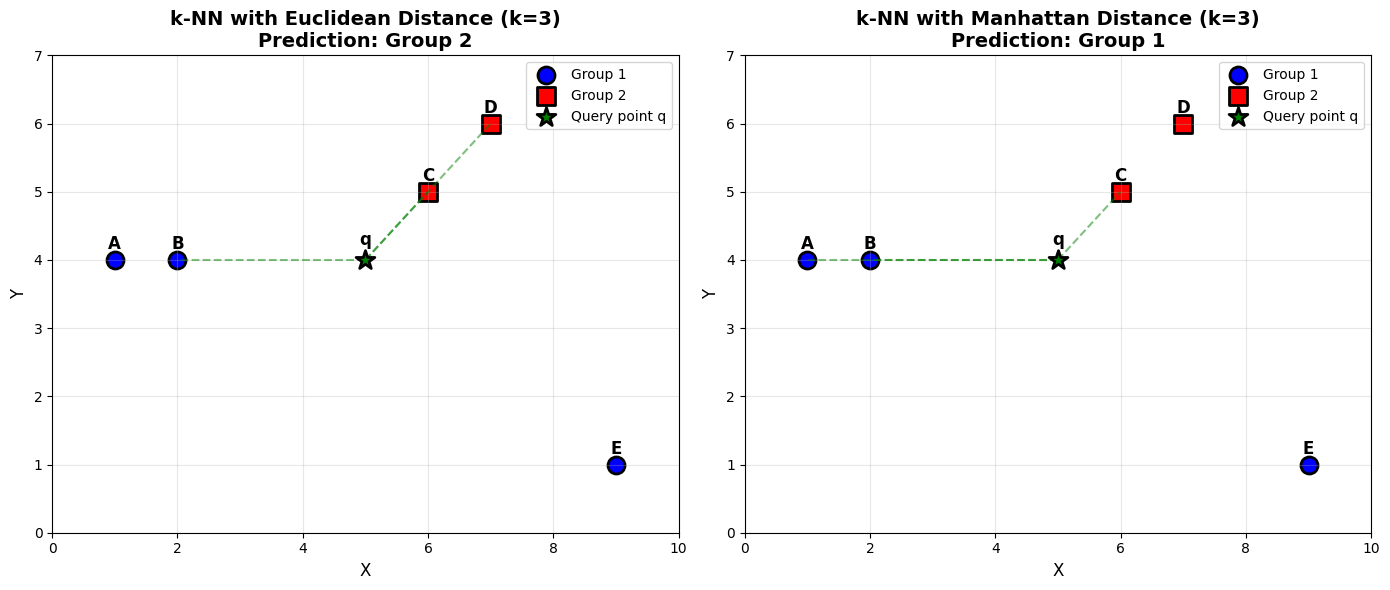


Visualization saved as 'knn_classification.png' in current directory


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
points = {"A": (1, 4), "B": (2, 4), "C": (6, 5), "D": (7, 6), "E": (9, 1)}

# Define groups
group_1 = ["A", "B", "E"]
group_2 = ["C", "D"]

# Query point
q = (5, 4)

# k value
k = 3

print("=" * 60)
print("k-NN CLASSIFICATION PROBLEM")
print("=" * 60)
print(f"\nDataset points:")
for name, coord in points.items():
    group = 1 if name in group_1 else 2
    print(f"  {name} = {coord} (Group {group})")
print(f"\nQuery point q = {q}")
print(f"k = {k}")

# Part (a): Euclidean distance
print("\n" + "=" * 60)
print("(a) EUCLIDEAN DISTANCE")
print("=" * 60)

euclidean_distances = {}
for name, coord in points.items():
    distance = np.sqrt((q[0] - coord[0]) ** 2 + (q[1] - coord[1]) ** 2)
    euclidean_distances[name] = distance
    print(
        f"d(q, {name}) = √[(5-{coord[0]})² + (4-{coord[1]})²] = √[{(q[0] - coord[0]) ** 2} + {(q[1] - coord[1]) ** 2}] = {distance:.4f}"
    )

# Sort by distance
sorted_euclidean = sorted(euclidean_distances.items(), key=lambda x: x[1])
print(f"\nSorted distances (Euclidean):")
for i, (name, dist) in enumerate(sorted_euclidean, 1):
    group = 1 if name in group_1 else 2
    print(f"  {i}. {name}: {dist:.4f} (Group {group})")

print(
    f"\nThree nearest neighbors: {', '.join([name for name, _ in sorted_euclidean[:k]])}"
)

# Part (b): Majority vote with Euclidean
print("\n" + "=" * 60)
print("(b) CLASSIFICATION WITH EUCLIDEAN DISTANCE")
print("=" * 60)

nearest_k_euclidean = sorted_euclidean[:k]
votes_euclidean = {"Group 1": 0, "Group 2": 0}

print(f"\nVoting from {k} nearest neighbors:")
for name, dist in nearest_k_euclidean:
    if name in group_1:
        votes_euclidean["Group 1"] += 1
        print(f"  {name} (distance: {dist:.4f}) → Group 1")
    else:
        votes_euclidean["Group 2"] += 1
        print(f"  {name} (distance: {dist:.4f}) → Group 2")

print(f"\nVote count:")
print(f"  Group 1: {votes_euclidean['Group 1']} votes")
print(f"  Group 2: {votes_euclidean['Group 2']} votes")

predicted_group_euclidean = (
    1 if votes_euclidean["Group 1"] > votes_euclidean["Group 2"] else 2
)
print(f"\n→ Query point q is classified as: GROUP {predicted_group_euclidean}")

# Part (c): Manhattan distance
print("\n" + "=" * 60)
print("(c) MANHATTAN (L1) DISTANCE")
print("=" * 60)

manhattan_distances = {}
for name, coord in points.items():
    distance = abs(q[0] - coord[0]) + abs(q[1] - coord[1])
    manhattan_distances[name] = distance
    print(
        f"d(q, {name}) = |5-{coord[0]}| + |4-{coord[1]}| = {abs(q[0] - coord[0])} + {abs(q[1] - coord[1])} = {distance:.4f}"
    )

# Sort by distance
sorted_manhattan = sorted(manhattan_distances.items(), key=lambda x: x[1])
print(f"\nSorted distances (Manhattan):")
for i, (name, dist) in enumerate(sorted_manhattan, 1):
    group = 1 if name in group_1 else 2
    print(f"  {i}. {name}: {dist:.4f} (Group {group})")

print(
    f"\nThree nearest neighbors: {', '.join([name for name, _ in sorted_manhattan[:k]])}"
)

# Majority vote with Manhattan
nearest_k_manhattan = sorted_manhattan[:k]
votes_manhattan = {"Group 1": 0, "Group 2": 0}

print(f"\nVoting from {k} nearest neighbors:")
for name, dist in nearest_k_manhattan:
    if name in group_1:
        votes_manhattan["Group 1"] += 1
        print(f"  {name} (distance: {dist:.4f}) → Group 1")
    else:
        votes_manhattan["Group 2"] += 1
        print(f"  {name} (distance: {dist:.4f}) → Group 2")

print(f"\nVote count:")
print(f"  Group 1: {votes_manhattan['Group 1']} votes")
print(f"  Group 2: {votes_manhattan['Group 2']} votes")

predicted_group_manhattan = (
    1 if votes_manhattan["Group 1"] > votes_manhattan["Group 2"] else 2
)
print(f"\n→ Query point q is classified as: GROUP {predicted_group_manhattan}")

# Compare results
print("\n" + "=" * 60)
print("COMPARISON")
print("=" * 60)
print(f"\nEuclidean distance classification: Group {predicted_group_euclidean}")
print(f"Manhattan distance classification: Group {predicted_group_manhattan}")

if predicted_group_euclidean == predicted_group_manhattan:
    print("\n→ The result DOES NOT change when using Manhattan distance.")
else:
    print("\n→ The result CHANGES when using Manhattan distance!")

# Visualization
print("\n" + "=" * 60)
print("GENERATING VISUALIZATION...")
print("=" * 60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Euclidean
for name, coord in points.items():
    if name in group_1:
        ax1.scatter(
            coord[0],
            coord[1],
            c="blue",
            s=150,
            marker="o",
            edgecolors="black",
            linewidth=2,
            label="Group 1" if name == "A" else "",
        )
    else:
        ax1.scatter(
            coord[0],
            coord[1],
            c="red",
            s=150,
            marker="s",
            edgecolors="black",
            linewidth=2,
            label="Group 2" if name == "C" else "",
        )
    ax1.annotate(
        name,
        coord,
        fontsize=12,
        fontweight="bold",
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax1.scatter(
    q[0],
    q[1],
    c="green",
    s=200,
    marker="*",
    edgecolors="black",
    linewidth=2,
    label="Query point q",
    zorder=5,
)
ax1.annotate(
    "q",
    q,
    fontsize=12,
    fontweight="bold",
    ha="center",
    va="bottom",
    xytext=(0, 8),
    textcoords="offset points",
)

# Draw circles to k nearest neighbors (Euclidean)
for name, _ in nearest_k_euclidean:
    coord = points[name]
    ax1.plot([q[0], coord[0]], [q[1], coord[1]], "g--", alpha=0.5, linewidth=1.5)

ax1.set_xlabel("X", fontsize=12)
ax1.set_ylabel("Y", fontsize=12)
ax1.set_title(
    f"k-NN with Euclidean Distance (k={k})\nPrediction: Group {predicted_group_euclidean}",
    fontsize=14,
    fontweight="bold",
)
ax1.grid(True, alpha=0.3)
ax1.legend(loc="best")
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 7)

# Plot for Manhattan
for name, coord in points.items():
    if name in group_1:
        ax2.scatter(
            coord[0],
            coord[1],
            c="blue",
            s=150,
            marker="o",
            edgecolors="black",
            linewidth=2,
            label="Group 1" if name == "A" else "",
        )
    else:
        ax2.scatter(
            coord[0],
            coord[1],
            c="red",
            s=150,
            marker="s",
            edgecolors="black",
            linewidth=2,
            label="Group 2" if name == "C" else "",
        )
    ax2.annotate(
        name,
        coord,
        fontsize=12,
        fontweight="bold",
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax2.scatter(
    q[0],
    q[1],
    c="green",
    s=200,
    marker="*",
    edgecolors="black",
    linewidth=2,
    label="Query point q",
    zorder=5,
)
ax2.annotate(
    "q",
    q,
    fontsize=12,
    fontweight="bold",
    ha="center",
    va="bottom",
    xytext=(0, 8),
    textcoords="offset points",
)

# Draw lines to k nearest neighbors (Manhattan)
for name, _ in nearest_k_manhattan:
    coord = points[name]
    ax2.plot([q[0], coord[0]], [q[1], coord[1]], "g--", alpha=0.5, linewidth=1.5)

ax2.set_xlabel("X", fontsize=12)
ax2.set_ylabel("Y", fontsize=12)
ax2.set_title(
    f"k-NN with Manhattan Distance (k={k})\nPrediction: Group {predicted_group_manhattan}",
    fontsize=14,
    fontweight="bold",
)
ax2.grid(True, alpha=0.3)
ax2.legend(loc="best")
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 7)

plt.tight_layout()
plt.savefig("knn_classification.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nVisualization saved as 'knn_classification.png' in current directory")


In [2]:
import numpy as np

# Set up the network parameters
W0 = np.array([[0, 1, -2], [3, -1, 1]], dtype=float)  # Shape: (2, 3)

W1 = np.array([[-0.5, 1.2]], dtype=float)  # Shape: (1, 2)

x = np.array([[1], [-2], [4]], dtype=float)  # Shape: (3, 1)

y_true = 9
learning_rate = 0.1

print("=" * 60)
print("INITIAL SETUP")
print("=" * 60)
print(f"W^(0) (Hidden layer weights):\n{W0}")
print(f"Shape: {W0.shape}")
print()
print(f"W^(1) (Output layer weights):\n{W1}")
print(f"Shape: {W1.shape}")
print()
print(f"Input x:\n{x.T}")
print(f"Shape: {x.shape}")
print()
print(f"y_true: {y_true}")
print(f"Learning rate: {learning_rate}")
print()

# ============================================================================
# TASK 1: FORWARD PROPAGATION
# ============================================================================
print("=" * 60)
print("TASK 1: FORWARD PROPAGATION")
print("=" * 60)

# Layer 0 -> Hidden layer
z0 = W0 @ x  # Shape: (2, 1)
print(f"z^(0) = W^(0) @ x:\n{z0.T}")

# ReLU activation
a0 = np.maximum(0, z0)  # Shape: (2, 1)
print(f"a^(0) = ReLU(z^(0)):\n{a0.T}")
print()

# Hidden -> Output layer
z1 = W1 @ a0  # Shape: (1, 1)
print(f"z^(1) = W^(1) @ a^(0):\n{z1}")

# ReLU activation (output)
y = np.maximum(0, z1)  # Shape: (1, 1)
print(f"y = ReLU(z^(1)):\n{y}")
print()

# Loss
L = 0.5 * (y - y_true) ** 2
print(f"Loss L = 1/2 * (y - y_true)^2 = {L[0, 0]:.4f}")
print()

# ============================================================================
# TASK 2: BACKPROPAGATION FORMULAS (DERIVATION)
# ============================================================================
print("=" * 60)
print("TASK 2: BACKPROPAGATION FORMULAS")
print("=" * 60)
print("Given:")
print("  L = 1/2 * (y - y_true)^2")
print("  y = ReLU(z^(1)), where z^(1) = W^(1) @ a^(0)")
print("  a^(0) = ReLU(z^(0)), where z^(0) = W^(0) @ x")
print()
print("Derivatives:")
print("  ∂L/∂y = (y - y_true)")
print("  ∂y/∂z^(1) = 1 if z^(1) > 0, else 0  [ReLU derivative]")
print("  ∂z^(1)/∂W^(1) = (a^(0))^T")
print()
print("For W^(1):")
print("  ∂L/∂W^(1) = ∂L/∂y * ∂y/∂z^(1) * ∂z^(1)/∂W^(1)")
print("            = (y - y_true) * ReLU'(z^(1)) * (a^(0))^T")
print()
print("For W^(0):")
print("  ∂L/∂W^(0) = ∂L/∂y * ∂y/∂z^(1) * ∂z^(1)/∂a^(0) * ∂a^(0)/∂z^(0) * ∂z^(0)/∂W^(0)")
print("            = (y - y_true) * ReLU'(z^(1)) * (W^(1))^T * ReLU'(z^(0)) * x^T")
print("  where ReLU'(z^(0)) is element-wise multiplication (Hadamard product)")
print()

# ============================================================================
# TASK 3: CALCULATE GRADIENTS
# ============================================================================
print("=" * 60)
print("TASK 3: CALCULATE GRADIENTS")
print("=" * 60)

# Output layer gradient
dL_dy = y - y_true
print(f"∂L/∂y = (y - y_true) = {dL_dy[0, 0]:.4f}")

# ReLU derivative at output
dy_dz1 = (z1 > 0).astype(float)
print(f"∂y/∂z^(1) = ReLU'(z^(1)) = {dy_dz1[0, 0]:.4f}")

# Delta for output layer
delta1 = dL_dy * dy_dz1
print(f"δ^(1) = ∂L/∂y * ∂y/∂z^(1) = {delta1[0, 0]:.4f}")
print()

# Gradient w.r.t. W^(1)
dL_dW1 = delta1 @ a0.T  # Shape: (1, 2)
print(f"∂L/∂W^(1) = δ^(1) @ (a^(0))^T:")
print(f"{dL_dW1}")
print()

# Backpropagate to hidden layer
delta0_pre = W1.T @ delta1  # Shape: (2, 1)
print(f"(W^(1))^T @ δ^(1):\n{delta0_pre.T}")

# ReLU derivative at hidden layer (element-wise)
da0_dz0 = (z0 > 0).astype(float)
print(f"ReLU'(z^(0)):\n{da0_dz0.T}")

# Delta for hidden layer (element-wise multiplication)
delta0 = delta0_pre * da0_dz0
print(f"δ^(0) = (W^(1))^T @ δ^(1) ⊙ ReLU'(z^(0)):\n{delta0.T}")
print()

# Gradient w.r.t. W^(0)
dL_dW0 = delta0 @ x.T  # Shape: (2, 3)
print(f"∂L/∂W^(0) = δ^(0) @ x^T:")
print(f"{dL_dW0}")
print()

# ============================================================================
# TASK 4: GRADIENT DESCENT UPDATE AND NEW FORWARD PASS
# ============================================================================
print("=" * 60)
print("TASK 4: GRADIENT DESCENT UPDATE")
print("=" * 60)

# Update weights
W1_new = W1 - learning_rate * dL_dW1
W0_new = W0 - learning_rate * dL_dW0

print(f"W^(1)_new = W^(1) - η * ∂L/∂W^(1):")
print(f"{W1_new}")
print()

print(f"W^(0)_new = W^(0) - η * ∂L/∂W^(0):")
print(f"{W0_new}")
print()

# Forward pass with updated weights
print("=" * 60)
print("FORWARD PASS WITH UPDATED WEIGHTS")
print("=" * 60)

z0_new = W0_new @ x
print(f"z^(0)_new = W^(0)_new @ x:\n{z0_new.T}")

a0_new = np.maximum(0, z0_new)
print(f"a^(0)_new = ReLU(z^(0)_new):\n{a0_new.T}")
print()

z1_new = W1_new @ a0_new
print(f"z^(1)_new = W^(1)_new @ a^(0)_new:\n{z1_new}")

y_new = np.maximum(0, z1_new)
print(f"y_new = ReLU(z^(1)_new):\n{y_new}")
print()

L_new = 0.5 * (y_new - y_true) ** 2
print(f"Loss L_new = 1/2 * (y_new - y_true)^2 = {L_new[0, 0]:.4f}")
print()

print("=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"Original output y: {y[0, 0]:.4f}")
print(f"Original loss L: {L[0, 0]:.4f}")
print()
print(f"Updated output y_new: {y_new[0, 0]:.4f}")
print(f"Updated loss L_new: {L_new[0, 0]:.4f}")
print()
print(f"Loss reduction: {L[0, 0] - L_new[0, 0]:.4f}")
print(f"Output moved closer to y_true = {y_true}")


INITIAL SETUP
W^(0) (Hidden layer weights):
[[ 0.  1. -2.]
 [ 3. -1.  1.]]
Shape: (2, 3)

W^(1) (Output layer weights):
[[-0.5  1.2]]
Shape: (1, 2)

Input x:
[[ 1. -2.  4.]]
Shape: (3, 1)

y_true: 9
Learning rate: 0.1

TASK 1: FORWARD PROPAGATION
z^(0) = W^(0) @ x:
[[-10.   9.]]
a^(0) = ReLU(z^(0)):
[[0. 9.]]

z^(1) = W^(1) @ a^(0):
[[10.8]]
y = ReLU(z^(1)):
[[10.8]]

Loss L = 1/2 * (y - y_true)^2 = 1.6200

TASK 2: BACKPROPAGATION FORMULAS
Given:
  L = 1/2 * (y - y_true)^2
  y = ReLU(z^(1)), where z^(1) = W^(1) @ a^(0)
  a^(0) = ReLU(z^(0)), where z^(0) = W^(0) @ x

Derivatives:
  ∂L/∂y = (y - y_true)
  ∂y/∂z^(1) = 1 if z^(1) > 0, else 0  [ReLU derivative]
  ∂z^(1)/∂W^(1) = (a^(0))^T

For W^(1):
  ∂L/∂W^(1) = ∂L/∂y * ∂y/∂z^(1) * ∂z^(1)/∂W^(1)
            = (y - y_true) * ReLU'(z^(1)) * (a^(0))^T

For W^(0):
  ∂L/∂W^(0) = ∂L/∂y * ∂y/∂z^(1) * ∂z^(1)/∂a^(0) * ∂a^(0)/∂z^(0) * ∂z^(0)/∂W^(0)
            = (y - y_true) * ReLU'(z^(1)) * (W^(1))^T * ReLU'(z^(0)) * x^T
  where ReLU'(z^(0)) is el

Dataset Shape: (392, 9)

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      108             62             32       56  25.2   
1            0      137             68             14      148  24.8   
2            1       89             66             23       94  28.1   
3            0      139             62             17      210  22.1   
4            4       99             76             15       51  23.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.128   21        0  
1                     0.143   21        0  
2                     0.167   21        0  
3                     0.207   21        0  
4                     0.223   21        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               39

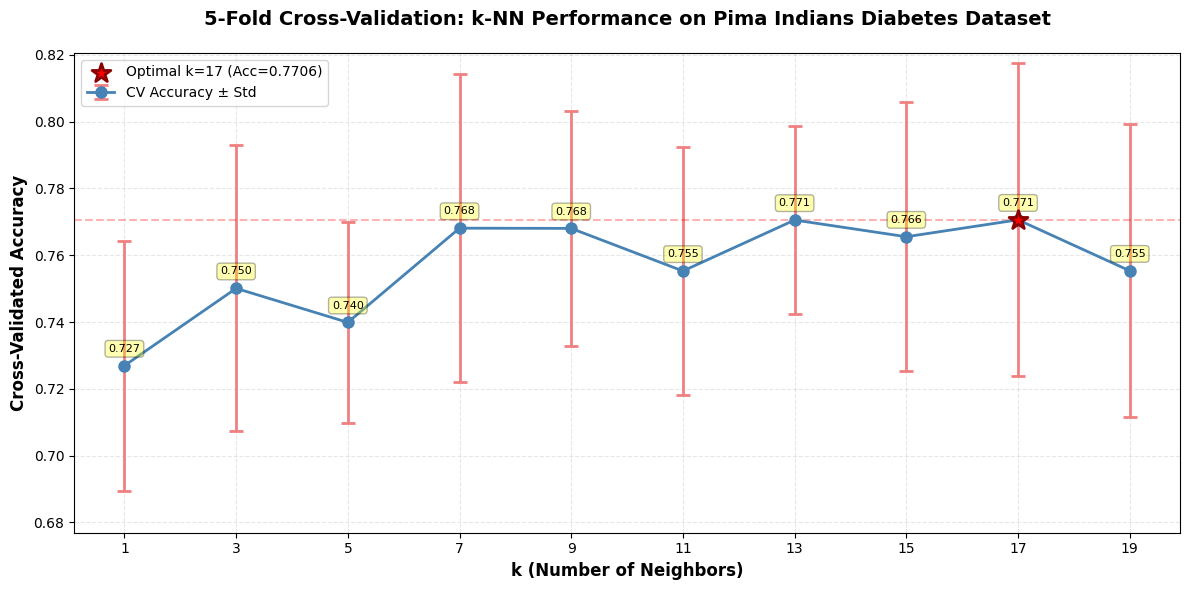

✓ Plot saved: q4a_cv_accuracy_with_std_band.png


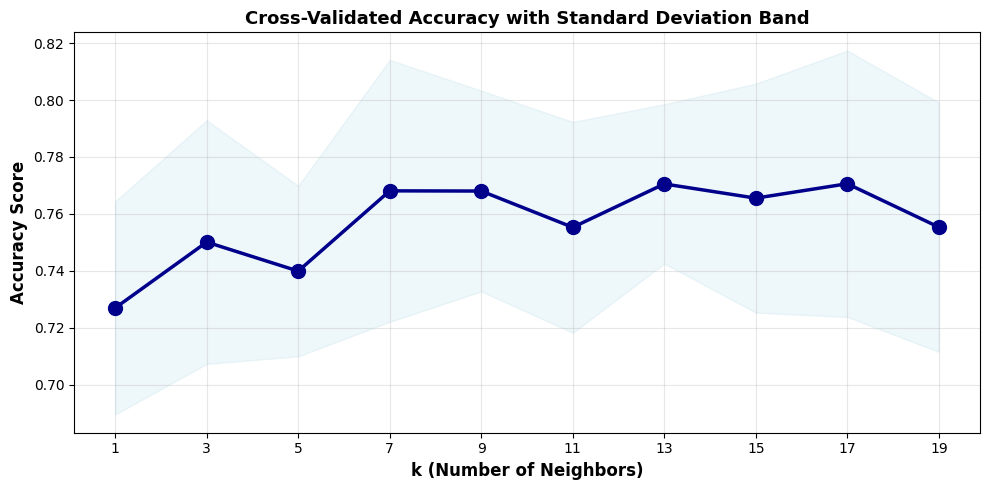


Part (a) Complete!
The optimal k value is: 17
With cross-validated accuracy: 0.7706

Plots saved in current directory:
  1. q4a_cv_accuracy_vs_k.png
  2. q4a_cv_accuracy_with_std_band.png


In [3]:
# Q4(a) Determine optimal k using 5-fold cross-validation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("hw4.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(df.iloc[:, -1].value_counts())

# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Feature scaling (important for k-NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of k values (odd numbers from 1 to 20)
k_values = [k for k in range(1, 21) if k % 2 == 1]
print(f"\nTesting k values: {k_values}")

# Initialize 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation scores for each k
cv_scores = []
cv_scores_std = []

print("\n" + "=" * 60)
print("5-Fold Cross-Validation Results")
print("=" * 60)

# Evaluate each k value
for k in k_values:
    # Create k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation
    scores = cross_val_score(knn, X_scaled, y, cv=cv, scoring="accuracy")

    # Store mean and standard deviation
    mean_score = scores.mean()
    std_score = scores.std()
    cv_scores.append(mean_score)
    cv_scores_std.append(std_score)

    print(
        f"k = {k:2d} | Mean Accuracy: {mean_score:.4f} | Std: {std_score:.4f} | Scores: {scores}"
    )

# Find the optimal k
optimal_k = k_values[np.argmax(cv_scores)]
best_accuracy = max(cv_scores)

print("\n" + "=" * 60)
print(f"OPTIMAL k: {optimal_k}")
print(f"BEST CROSS-VALIDATED ACCURACY: {best_accuracy:.4f}")
print("=" * 60)

# Create a detailed results table
results_df = pd.DataFrame(
    {"k": k_values, "Mean_Accuracy": cv_scores, "Std_Deviation": cv_scores_std}
)
print("\nDetailed Results Table:")
print(results_df.to_string(index=False))

# Plot 1: Cross-Validated Accuracy vs k
plt.figure(figsize=(12, 6))

# Main plot with error bars
plt.errorbar(
    k_values,
    cv_scores,
    yerr=cv_scores_std,
    marker="o",
    linestyle="-",
    linewidth=2,
    markersize=8,
    capsize=5,
    capthick=2,
    color="steelblue",
    ecolor="lightcoral",
    label="CV Accuracy ± Std",
)

# Highlight the optimal k
plt.scatter(
    [optimal_k],
    [best_accuracy],
    color="red",
    s=200,
    zorder=5,
    marker="*",
    edgecolors="darkred",
    linewidth=2,
    label=f"Optimal k={optimal_k} (Acc={best_accuracy:.4f})",
)

# Add horizontal line at best accuracy
plt.axhline(y=best_accuracy, color="red", linestyle="--", alpha=0.3, linewidth=1.5)

# Formatting
plt.xlabel("k (Number of Neighbors)", fontsize=12, fontweight="bold")
plt.ylabel("Cross-Validated Accuracy", fontsize=12, fontweight="bold")
plt.title(
    "5-Fold Cross-Validation: k-NN Performance on Pima Indians Diabetes Dataset",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.xticks(k_values)
plt.grid(True, alpha=0.3, linestyle="--")
plt.legend(loc="best", fontsize=10)
plt.ylim([min(cv_scores) - 0.05, max(cv_scores) + 0.05])

# Add value annotations for each point
for i, (k, score) in enumerate(zip(k_values, cv_scores)):
    plt.annotate(
        f"{score:.3f}",
        xy=(k, score),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.3),
    )

plt.tight_layout()
# Save the first plot
plt.savefig("q4a_cv_accuracy_vs_k.png", dpi=300, bbox_inches="tight")
print("\n✓ Plot saved: q4a_cv_accuracy_vs_k.png")
plt.show()

# Plot 2: Accuracy with Standard Deviation Band
plt.figure(figsize=(10, 5))
plt.plot(
    k_values,
    cv_scores,
    marker="o",
    linestyle="-",
    linewidth=2.5,
    markersize=10,
    color="darkblue",
)
plt.fill_between(
    k_values,
    np.array(cv_scores) - np.array(cv_scores_std),
    np.array(cv_scores) + np.array(cv_scores_std),
    alpha=0.2,
    color="lightblue",
)
plt.xlabel("k (Number of Neighbors)", fontsize=12, fontweight="bold")
plt.ylabel("Accuracy Score", fontsize=12, fontweight="bold")
plt.title(
    "Cross-Validated Accuracy with Standard Deviation Band",
    fontsize=13,
    fontweight="bold",
)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.tight_layout()
# Save the second plot
plt.savefig("q4a_cv_accuracy_with_std_band.png", dpi=300, bbox_inches="tight")
print("✓ Plot saved: q4a_cv_accuracy_with_std_band.png")
plt.show()

print("\n" + "=" * 60)
print("Part (a) Complete!")
print(f"The optimal k value is: {optimal_k}")
print(f"With cross-validated accuracy: {best_accuracy:.4f}")
print("=" * 60)
print("\nPlots saved in current directory:")
print("  1. q4a_cv_accuracy_vs_k.png")
print("  2. q4a_cv_accuracy_with_std_band.png")


Data Split Information
Training set size: 313 samples
Test set size: 79 samples
Training set class distribution:
0    209
1    104
Name: count, dtype: int64
Test set class distribution:
0    53
1    26
Name: count, dtype: int64

Testing k-NN with k=17 using different distance metrics

Euclidean Distance:
  Accuracy: 0.8101

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        53
           1       0.79      0.58      0.67        26

    accuracy                           0.81        79
   macro avg       0.80      0.75      0.77        79
weighted avg       0.81      0.81      0.80        79


Manhattan Distance:
  Accuracy: 0.7975

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        53
           1       0.78      0.54      0.64        26

    accuracy                           0.80        79
   macro avg       0.79      0.73      0.7

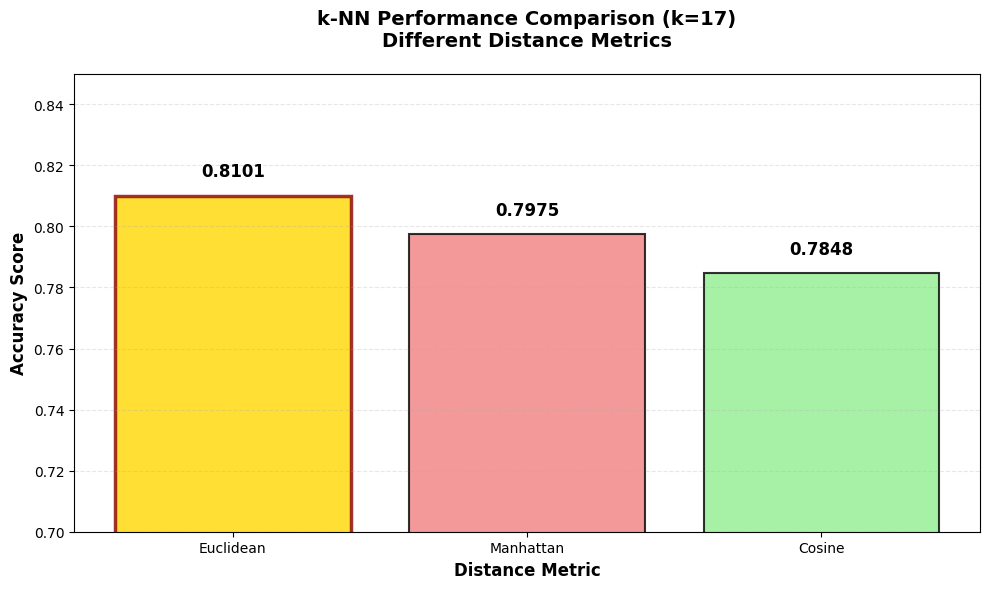

✓ Plot saved: q4b_confusion_matrices.png


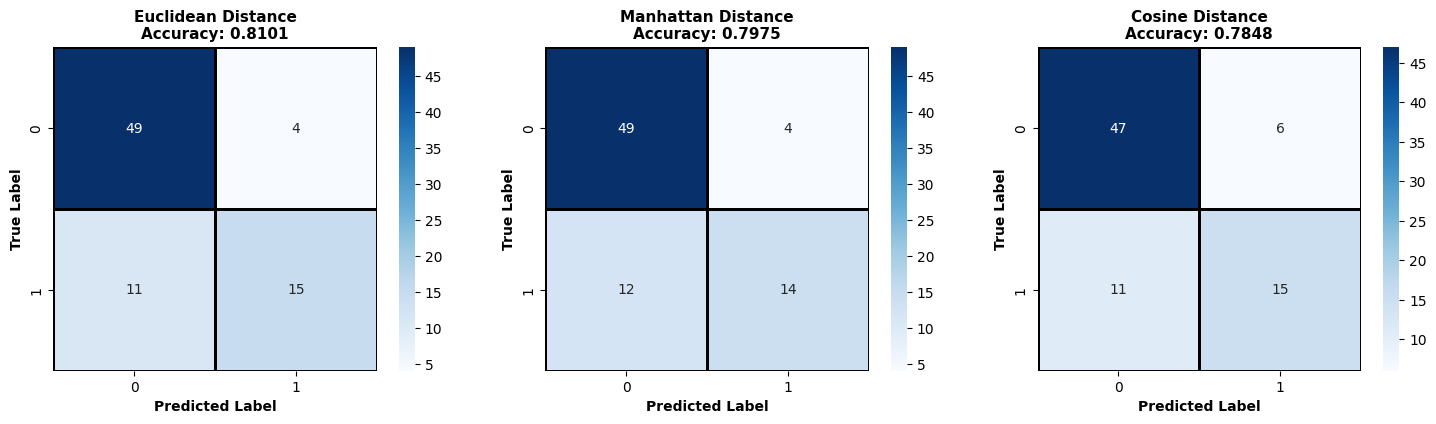


Part (b) Complete!
Optimal k: 17
Best distance metric: Euclidean
Best test accuracy: 0.8101


In [4]:
# Q4(b) Compare distance metrics using optimal k

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Split the data (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 60)
print("Data Split Information")
print("=" * 60)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set class distribution:\n{pd.Series(y_train).value_counts()}")
print(f"Test set class distribution:\n{pd.Series(y_test).value_counts()}")

# Distance metrics to test
distance_metrics = {
    "Euclidean": "euclidean",
    "Manhattan": "manhattan",
    "Cosine": "cosine",
}

# Store results
results = {}

print("\n" + "=" * 60)
print(f"Testing k-NN with k={optimal_k} using different distance metrics")
print("=" * 60)

# Test each distance metric
for metric_name, metric_value in distance_metrics.items():
    # Create and train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric_value)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[metric_name] = accuracy

    print(f"\n{metric_name} Distance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Find best metric
best_metric = max(results, key=results.get)
best_accuracy = results[best_metric]

print("\n" + "=" * 60)
print(f"BEST DISTANCE METRIC: {best_metric}")
print(f"BEST ACCURACY: {best_accuracy:.4f}")
print("=" * 60)

# Create results dataframe
results_df = pd.DataFrame(
    {"Distance Metric": list(results.keys()), "Accuracy": list(results.values())}
)
results_df = results_df.sort_values("Accuracy", ascending=False).reset_index(drop=True)
print("\nResults Summary:")
print(results_df.to_string(index=False))

# Plot 1: Bar chart comparing distance metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(
    results.keys(),
    results.values(),
    color=["steelblue", "lightcoral", "lightgreen"],
    edgecolor="black",
    linewidth=1.5,
    alpha=0.8,
)

# Highlight the best metric
best_idx = list(results.keys()).index(best_metric)
bars[best_idx].set_color("gold")
bars[best_idx].set_edgecolor("darkred")
bars[best_idx].set_linewidth(2.5)

# Add value labels on bars
for i, (metric, acc) in enumerate(results.items()):
    plt.text(
        i,
        acc + 0.005,
        f"{acc:.4f}",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

plt.xlabel("Distance Metric", fontsize=12, fontweight="bold")
plt.ylabel("Accuracy Score", fontsize=12, fontweight="bold")
plt.title(
    f"k-NN Performance Comparison (k={optimal_k})\nDifferent Distance Metrics",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.ylim([0.7, 0.85])
plt.grid(True, alpha=0.3, axis="y", linestyle="--")
plt.tight_layout()
plt.savefig("q4b_distance_metrics_comparison.png", dpi=300, bbox_inches="tight")
print("\n✓ Plot saved: q4b_distance_metrics_comparison.png")
plt.show()

# Plot 2: Confusion matrices for all metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (metric_name, metric_value) in enumerate(distance_metrics.items()):
    # Train and predict
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric_value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=axes[idx],
        cbar=True,
        square=True,
        linewidths=1,
        linecolor="black",
    )
    axes[idx].set_title(
        f"{metric_name} Distance\nAccuracy: {results[metric_name]:.4f}",
        fontsize=11,
        fontweight="bold",
    )
    axes[idx].set_xlabel("Predicted Label", fontsize=10, fontweight="bold")
    axes[idx].set_ylabel("True Label", fontsize=10, fontweight="bold")

    # Highlight best metric
    if metric_name == best_metric:
        for spine in axes[idx].spines.values():
            spine.set_edgecolor("red")
            spine.set_linewidth(3)

plt.tight_layout()
plt.savefig("q4b_confusion_matrices.png", dpi=300, bbox_inches="tight")
print("✓ Plot saved: q4b_confusion_matrices.png")
plt.show()

print("\n" + "=" * 60)
print("Part (b) Complete!")
print(f"Optimal k: {optimal_k}")
print(f"Best distance metric: {best_metric}")
print(f"Best test accuracy: {best_accuracy:.4f}")
print("=" * 60)


Available features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Glucose index: 1
BMI index: 5

2D Model Performance:
k = 17, metric = euclidean
Test Accuracy: 0.7342

✓ Plot saved: q4c_decision_boundary.png


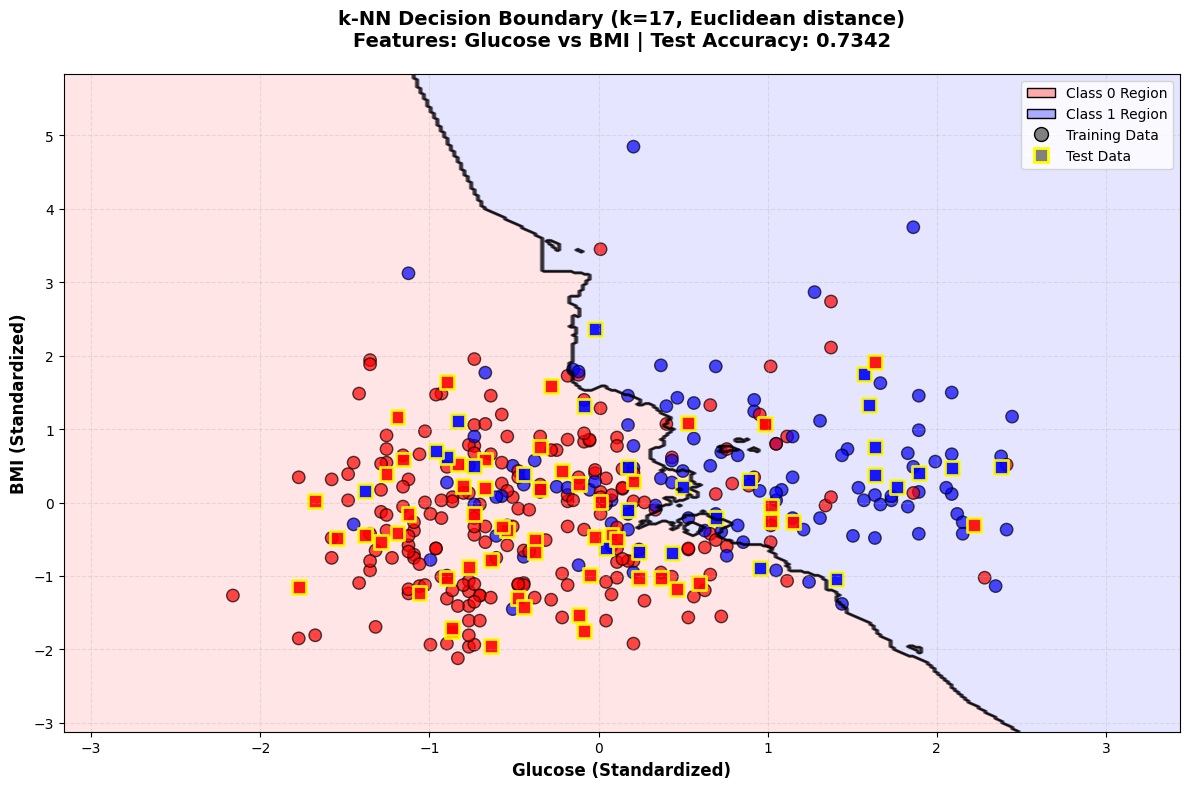


Part (c) Complete!
Decision boundary plotted using Glucose and BMI features
Model: k=17, metric=euclidean
2D Test Accuracy: 0.7342


In [5]:
# Q4(c) Visualize k-NN decision boundary using Glucose and BMI features

from matplotlib.colors import ListedColormap

# Get feature names (assuming the CSV has headers)
feature_names = df.columns[:-1].tolist()
print("Available features:", feature_names)

# Find indices for Glucose and BMI
glucose_idx = feature_names.index("Glucose")
bmi_idx = feature_names.index("BMI")

print(f"\nGlucose index: {glucose_idx}")
print(f"BMI index: {bmi_idx}")

# Extract Glucose and BMI features
X_2d = X[:, [glucose_idx, bmi_idx]]

# Scale the 2D features
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Split the 2D data
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Convert best_metric to lowercase for sklearn
best_metric_lower = best_metric.lower()

# Train k-NN with optimal k and best metric
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k, metric=best_metric_lower)
knn_2d.fit(X_train_2d, y_train_2d)

# Calculate accuracy
y_pred_2d = knn_2d.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test_2d, y_pred_2d)

print(f"\n2D Model Performance:")
print(f"k = {optimal_k}, metric = {best_metric_lower}")
print(f"Test Accuracy: {accuracy_2d:.4f}")

# Create mesh for decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point in the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 8))

# Color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.contour(xx, yy, Z, colors="black", linewidths=1.5, alpha=0.3)

# Plot training points
scatter_train = plt.scatter(
    X_train_2d[:, 0],
    X_train_2d[:, 1],
    c=y_train_2d,
    cmap=cmap_bold,
    edgecolor="black",
    s=80,
    alpha=0.7,
    marker="o",
    label="Training Data",
)

# Plot test points
scatter_test = plt.scatter(
    X_test_2d[:, 0],
    X_test_2d[:, 1],
    c=y_test_2d,
    cmap=cmap_bold,
    edgecolor="yellow",
    s=100,
    alpha=0.9,
    marker="s",
    linewidths=2,
    label="Test Data",
)

plt.xlabel("Glucose (Standardized)", fontsize=12, fontweight="bold")
plt.ylabel("BMI (Standardized)", fontsize=12, fontweight="bold")
plt.title(
    f"k-NN Decision Boundary (k={optimal_k}, {best_metric} distance)\n"
    + f"Features: Glucose vs BMI | Test Accuracy: {accuracy_2d:.4f}",
    fontsize=14,
    fontweight="bold",
    pad=20,
)

# Create custom legend
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#FFAAAA", edgecolor="black", label="Class 0 Region"),
    Patch(facecolor="#AAAAFF", edgecolor="black", label="Class 1 Region"),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="gray",
        markersize=10,
        markeredgecolor="black",
        label="Training Data",
    ),
    plt.Line2D(
        [0],
        [0],
        marker="s",
        color="w",
        markerfacecolor="gray",
        markersize=10,
        markeredgecolor="yellow",
        markeredgewidth=2,
        label="Test Data",
    ),
]
plt.legend(handles=legend_elements, loc="best", fontsize=10)

plt.grid(True, alpha=0.3, linestyle="--")
plt.tight_layout()
plt.savefig("q4c_decision_boundary.png", dpi=300, bbox_inches="tight")
print("\n✓ Plot saved: q4c_decision_boundary.png")
plt.show()

print("\n" + "=" * 60)
print("Part (c) Complete!")
print(f"Decision boundary plotted using Glucose and BMI features")
print(f"Model: k={optimal_k}, metric={best_metric_lower}")
print(f"2D Test Accuracy: {accuracy_2d:.4f}")
print("=" * 60)
